# **TIME SERIES FORECASTING - ARIMA PROCESS**

Name: **ARIMA Process**  
Date : 2022  
Author: Aurélien Vannieuwenhuyze  


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under the terms of the <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.</a>.
<hr/>

In [1]:
!pip install statsmodels 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.8 MB/s 
     |████████████████████████████████| 9.9 MB 41.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [3]:
import pandas as pnd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import  plot_pacf, plot_acf
import statsmodels.api as sm
import numpy as np
import pmdarima as pm

##1: AR and MA

In [4]:
TS = pnd.read_csv('AirPassengers.csv')

In [5]:
TS.head()

,Yt
0,112
1,118
2,132
3,129
4,121


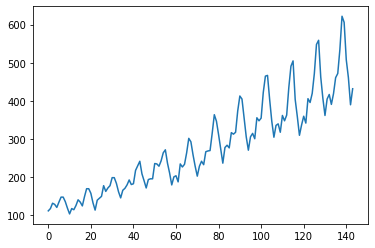

In [6]:
plt.plot(TS['Yt'])
plt.show()

###1.1: Make Time series stationnary

In [7]:
def differencing(TimeSerie, difference_order=1):
	diff = list()
	for i in range(difference_order, len(TimeSerie)):
		value = TimeSerie[i] - TimeSerie[i - difference_order]
		diff.append(value)
	return diff

In [8]:
def findingLagDifferencing(y,nbTests=20):


  #Test if the time series is not already stationary
  ADF = adfuller(y, autolag='AIC')
  if ADF[1] < 0.05:
    print("The time series is already stationay")
    differenceOrder = 0
    found=False
    diff = y
  else:

  #Loop until the time series is stationary
    differenceOrder = 1
    found=False
    research = True
    while research:

      if differenceOrder<nbTests:
        research=True
        diff = differencing(y, difference_order=differenceOrder)
        ADF = adfuller(diff, autolag='AIC')
      
        if ADF[1] < 0.05:
          research=False
          found=True
        else:
          differenceOrder+=1
      else:
        research=False
        found = False

  return found,differenceOrder,diff

In [9]:
found,lag,diff = findingLagDifferencing(TS['Yt'])
if found:
  print("Difference order = ",lag)
  
else:
  print("Difference order not found")

Difference order =  2


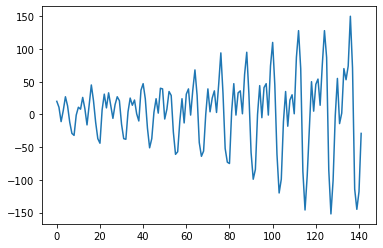

In [10]:
plt.plot(diff)
plt.show()

###1.2: Find the significant lag of partial autocorrelation with PACF

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


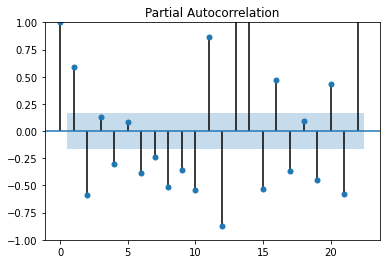

In [11]:
plot_pacf(np.array(diff))
plt.show()

$$AR(2)$$

$$y_t = c + \beta_1y_{t-1} + \beta_2y_{t-2} + \epsilon_t$$

In [12]:
significantARLag = 2 #Found with PACF

###1.3: Find the significant lag of autocorrelation with ACF

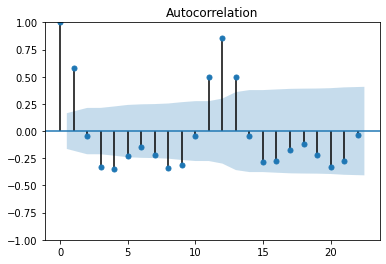

In [13]:
plot_acf(np.array(diff))
plt.show()

$$MA(1)$$

$$y_t = \mu + \epsilon_t + \beta_1*\epsilon_{t-1}$$

In [14]:
significantMALag = 1 #Found with ACF

##**2: ARIMA (p,d,q)**

###2.1: Integrated model

$$ARIMA(p,d,q)$$
$$p = \text{ AR order}$$
$$d = \text{ difference order}$$
$$q = \text{ MA order}$$

$d$ is The number of times that the raw observations are differenced, also called the degree of differencing.

###2.2: Train the ARIMA model

In our case, we made a difference 1 to make our time series stationary  
the $d=1$

$$AR(2),I(2),MA(1)$$

In [15]:
integratedOfOrder = 2

In [16]:
ARIMA = pm.ARIMA(order=(significantARLag, integratedOfOrder,significantMALag))

In [17]:
ARIMA.fit(TS["Yt"])

ARIMA(order=(2, 2, 1))

In [18]:
ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 2, 1)   Log Likelihood                -692.940
Date:                Thu, 01 Dec 2022   AIC                           1395.880
Time:                        09:07:57   BIC                           1410.659
Sample:                             0   HQIC                          1401.886
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0032      0.065      0.049      0.961      -0.125       0.131
ar.L1          0.3846      0.109      3.545      0.000       0.172       0.597
ar.L2         -0.2260      0.074     -3.071      0.002      -0.370      -0.082
ma.L1         -0.9993      1.852     -0.539      0.590      -4.630       2.631
sigma2       980.9028   1842.017      0.533      0.594   -2629.383    4591.189
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.64   Prob(JB):                         0.76
Heteroskedasticity (H):               8.21   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- if $intercept = 0$ and $d=0$ the long-term forecasts will go to zero.
- if $intercept = 0$ and $d=1$ the long-term forecasts will go to a non-zero constant.
- if $intercept = 0$ and $d=2$ the long-term forecasts will follow a straight line.
- if $intercept \neq 0$ and $d=0$ the long-term forecasts will go to the mean of the data.
- if $intercept \neq 0$ and $d=1$ the long-term forecasts will follow a straight line.
- if $intercept \neq 0$ and $d=2$ the long-term forecasts will follow a quadratic trend.

###2.3: Forecasting

In [19]:
n_periods = 24
fc, confint = ARIMA.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(TS.values), len(TS.values)+n_periods)

In [20]:
fc_series = pnd.Series(fc, index=index_of_fc)

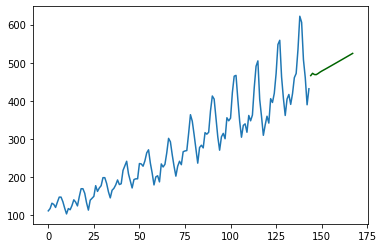

In [21]:
plt.plot(TS.values)
plt.plot(fc_series, color='darkgreen')

In our case, the $intercept \neq 0$ and $d=1$ we should observed a straight line

##3: OBSERVATIONS AND CONCLUSION

**The AR, MA and ARMA models are used for stationary time series.**

**Our time series is not stationary.** The integration parameter d, added to the ARMA model, allows to take into account this non-stationarity. We speak then of the ARIMA model.

- The value of the order of AR is found by PACF
- The value of the order of MA is found by PACF
- The integration value I corresponds to the number of differentiations necessary to make the time series stationary